In [1]:
import sys
sys.path.append(r'C:\Users\ricca\Desktop\MAGISTRALE\QTLab2324\DATA ANALYSIS')

In [2]:
from UTILS import drive

In [3]:
folder_id = '19ApmRMhBMmQ7gT2i8akhViuKDyhP3QML'

In [4]:
svc = drive.authenticate()

In [5]:
files = drive.list_files_in_folder(svc, folder_id, max_files=5)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

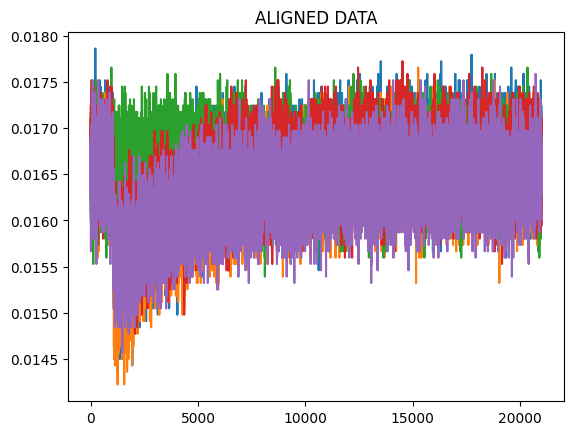

In [8]:
data = []

for file in files:
    compressed_file_io = drive.download_file_from_drive(svc, file['id'])
    # Decompress the HDF5 file and load it into memory
    temp = drive.decompress_hdf5_to_memory(compressed_file_io)
    data.append(temp)
    T = np.linspace(0,len(temp),len(temp))
    plt.plot(T,temp)
    plt.title('ALIGNED DATA')

In [9]:
from UTILS.OF import OF

In [12]:
# Instantiate the Medium class
medium_processor = OF.Medium()

len_fit = int(np.floor(len(temp)/10))
pol_amp = np.polyfit(T[:len_fit], temp[:len_fit], 2)
rms = np.sqrt(np.mean((np.polyval(pol_amp, T[:len_fit])-temp[:len_fit])**2)) 

baseline = np.mean(data, axis=0)
medium_processor.create_medium(data, bsl=baseline)

# Retrieve the created medium (expected signal)
created_medium = medium_processor.get_medium()

# Compute the Noise Power Spectrum (NPS) using the PSD function
sampling_time = 1.0 / len(data)  # Assuming a unit sampling rate
frequencies, NPS, _ = OF.PSD(data, sampling_time)

# Set the NPS in the medium processor
medium_processor.set_NPS(NPS)

# Create the optimal filter using the medium and NPS
H = OF.create_filter(created_medium, NPS)

# Apply the optimal filter to the noisy signals
pstart = 0  # Define pstart (starting index for parabolic fit)
OFT, OFF, OFdelay, OFtest = OF.applyOF(data, H)

# Plot the results
plt.figure(figsize=(14, 8))

# Plot original noisy signal
plt.subplot(3, 1, 1)
plt.plot(data, label="Noisy Signal")
plt.title("Original Noisy Signal")
plt.legend()

# Plot the created medium (expected signal)
plt.subplot(3, 1, 2)
plt.plot(created_medium, label="Created Medium (Expected Signal)", color='orange')
plt.title("Created Medium")
plt.legend()

# Plot the filtered signal
plt.subplot(3, 1, 3)
plt.plot(OFT, label="Filtered Signal", color='green')
plt.title("Filtered Signal After Applying Optimal Filter")
plt.legend()

plt.tight_layout()
plt.show()


AttributeError: 'list' object has no attribute 'T'